In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import NearestCentroid

In [2]:
beanz = pd.read_excel('Dry_Bean_Dataset.xlsx', na_values='?')
beanz

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
beanz.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [4]:
beanz.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


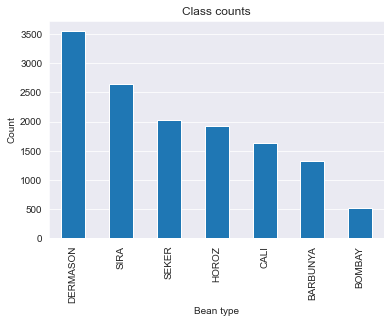

In [5]:
ax = beanz["Class"].value_counts().plot.bar(title = "Class counts", xlabel = 'Bean type', ylabel = 'Count', grid = True)
ax.grid(axis = 'x')
ax.set_axisbelow(True)

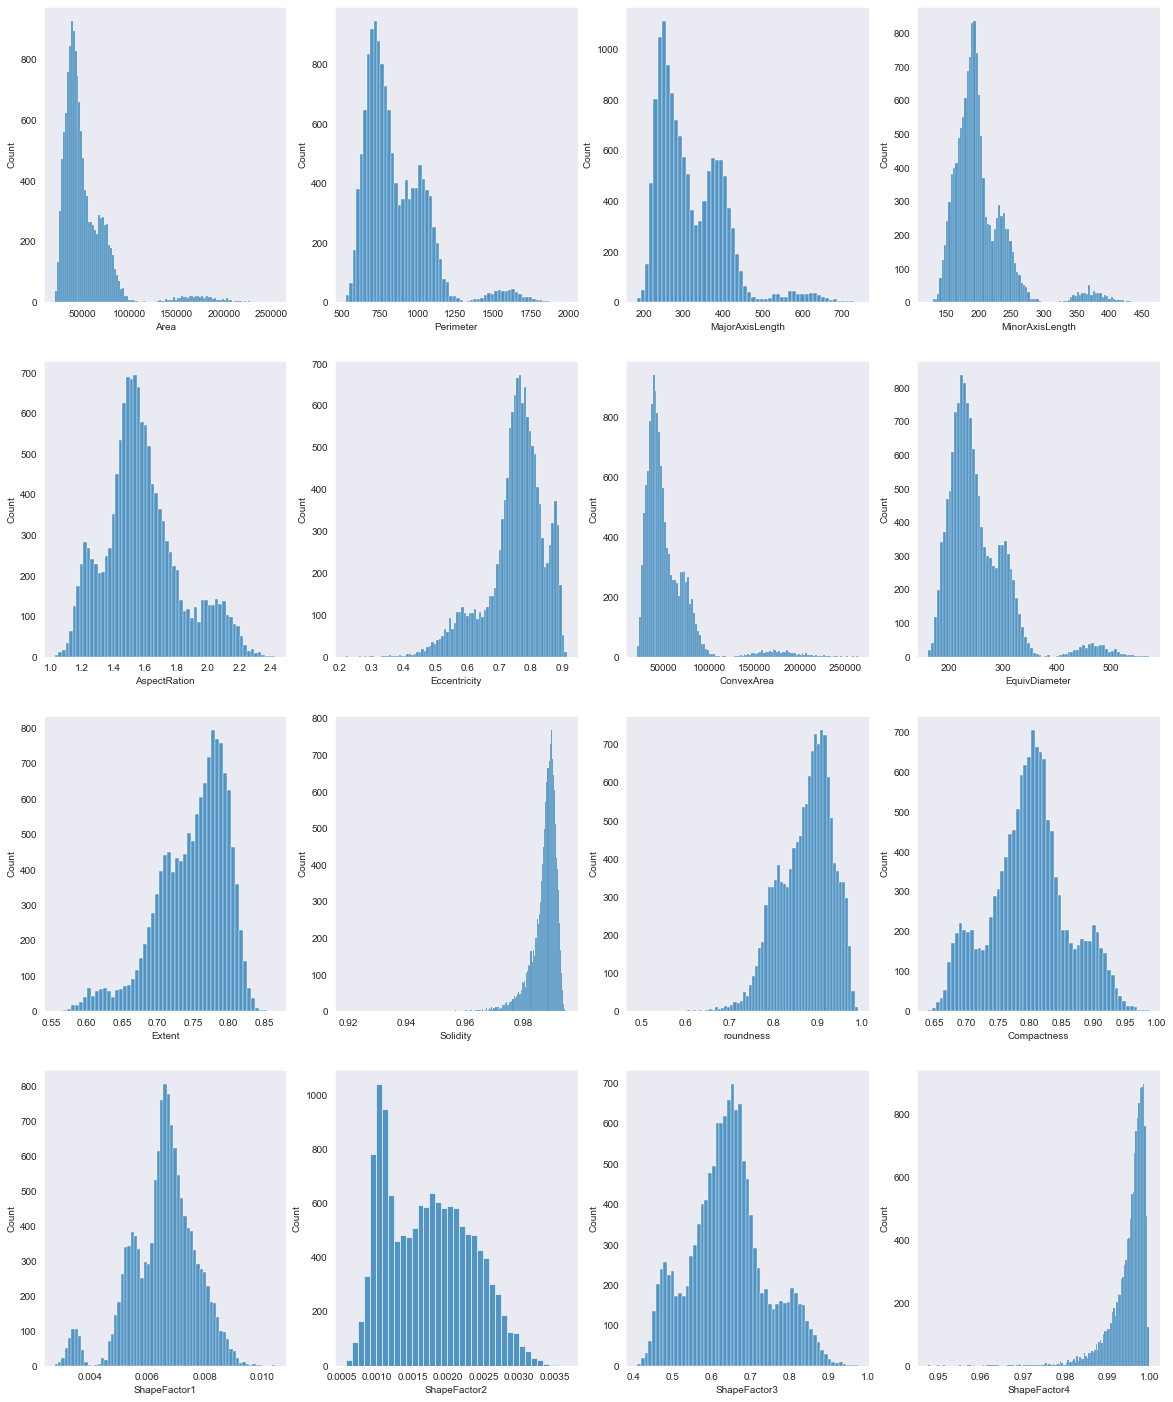

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(beanz.columns.drop("Class"), axes.flatten()):
    sns.histplot(data = beanz[feature], ax = ax)
    ax.grid()
    ax.set_axisbelow(True)
plt.show()

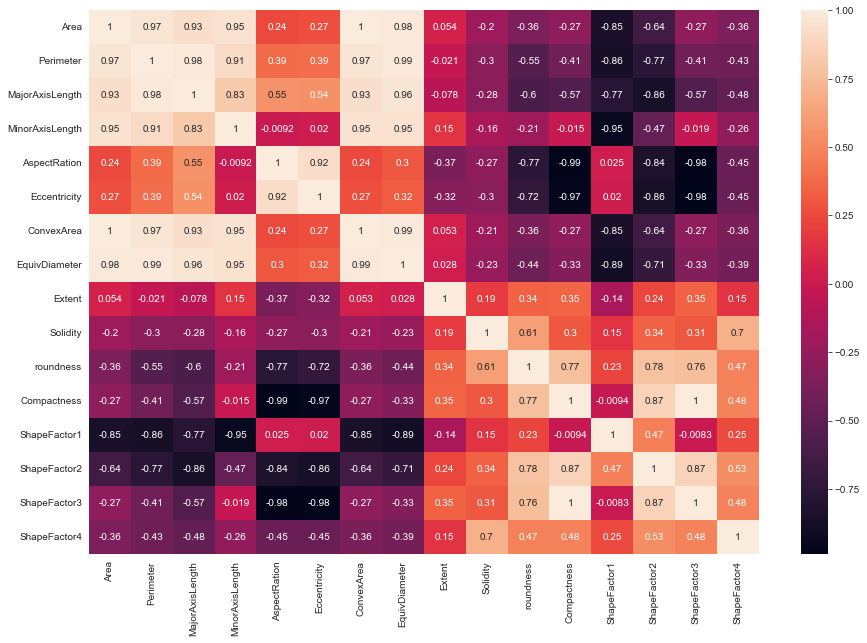

In [7]:
plt.rcParams["figure.figsize"] = (15, 10)
sns.heatmap(beanz.corr(), annot=True)
plt.show()

Ze wstępnej analizy danych wynika, że próbek jest 13611, cech 16, klas 6. Dane wymagają normalizacji, ponieważ wartości cech różnią się rzędami wielkości między sobą. W zbiorze danych nie ma brakujących danych. Z powyższej macierzy kowariancji wynika, że wiele cech jest ze sobą skorelowanych (zarówno dodatnio jak i ujemnie) w znacznym stopniu, ale nie przeszkodziło to w uzyskaniu wysokiej dokładności dopasowania modelu.

In [8]:
y = beanz[['Class']]
beanz = beanz.drop(columns=['Class'])

In [9]:
le = LabelEncoder()
y = np.asarray(y).ravel()
y = le.fit_transform(y)
c_labels = ['BAR', 'BOM', 'CAL', 'DER', 'HOR', 'SEK', 'SIR']
beanz['Class'] = y.reshape(len(y), 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(beanz, beanz['Class'], test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, x_train['Class'], test_size=0.2, random_state=42)

x_train = x_train.drop(columns=['Class'])
x_test = x_test.drop(columns=['Class'])
x_val = x_val.drop(columns=['Class'])

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)
x_val = mms.transform(x_val)

<h1><center><font size="6">NN</font></center></h1>

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
selector_nn = SelectKBest()
nn = KNeighborsClassifier(n_neighbors=1)
pipe_nn = Pipeline([('selector', selector_nn), ('knn', nn)])
param_grid_nn = {
    "knn__n_neighbors": [1],
    "selector__k": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
}
search_nn = GridSearchCV(pipe_nn, param_grid_nn, n_jobs=2)
search_nn.fit(x_train, y_train)
predicted_nn = search_nn.predict(x_val)
print(search_nn.best_params_)

{'knn__n_neighbors': 1, 'selector__k': 15}


              precision    recall  f1-score   support

           0       0.91      0.90      0.91       216
           1       1.00      1.00      1.00        69
           2       0.91      0.93      0.92       260
           3       0.89      0.90      0.89       534
           4       0.96      0.94      0.95       325
           5       0.95      0.92      0.93       337
           6       0.84      0.86      0.85       437

    accuracy                           0.91      2178
   macro avg       0.92      0.92      0.92      2178
weighted avg       0.91      0.91      0.91      2178



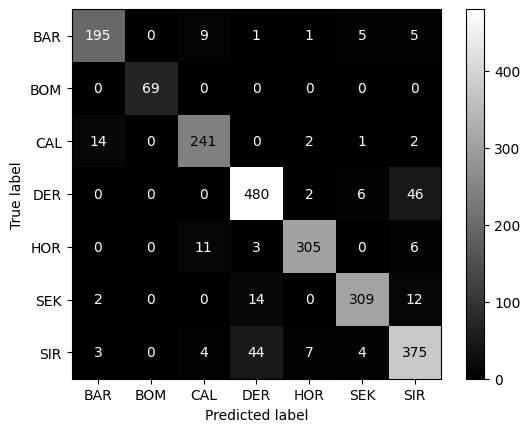

In [12]:
sns.reset_defaults()
cm = confusion_matrix(y_val, predicted_nn)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = c_labels).plot(cmap='gray')
print(classification_report(y_val, predicted_nn))

<h1><center><font size="6">kNN</font></center></h1>

In [13]:
knn = KNeighborsClassifier()
selector_knn = SelectKBest()
pipe_knn = Pipeline([('selector', selector_knn), ('knn', knn)])
param_grid = {
    "knn__n_neighbors": [2, 5, 10, 15, 50, 100, 150],
    "selector__k": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
}
search_knn = GridSearchCV(pipe_knn, param_grid, n_jobs=2)
search_knn.fit(x_train, y_train)
predicted_knn = search_knn.predict(x_val)
print(search_knn.best_params_)

{'knn__n_neighbors': 15, 'selector__k': 15}


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       216
           1       1.00      1.00      1.00        69
           2       0.91      0.96      0.93       260
           3       0.89      0.93      0.91       534
           4       0.97      0.94      0.96       325
           5       0.95      0.94      0.95       337
           6       0.88      0.86      0.87       437

    accuracy                           0.92      2178
   macro avg       0.94      0.93      0.93      2178
weighted avg       0.92      0.92      0.92      2178



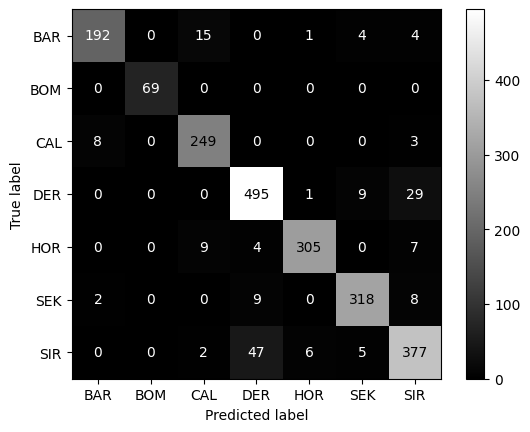

In [14]:
sns.reset_defaults()
cm = confusion_matrix(y_val, predicted_knn)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = c_labels).plot(cmap='gray')
print(classification_report(y_val, predicted_knn))

<h1><center><font size="6">NM</font></center></h1>

In [15]:
nc = NearestCentroid()
selector_nc = SelectKBest()
pipe_nc = Pipeline([('selector', selector_nc), ('nc', nc)])
param_grid = {
    "selector__k": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
}
search_nc = GridSearchCV(pipe_nc, param_grid, n_jobs=2)
search_nc.fit(x_train, y_train)
predicted_nc = search_nc.predict(x_val)
print(search_nc.best_params_)

{'selector__k': 15}


              precision    recall  f1-score   support

           0       0.92      0.79      0.85       216
           1       1.00      0.99      0.99        69
           2       0.84      0.94      0.89       260
           3       0.88      0.81      0.84       534
           4       0.96      0.93      0.95       325
           5       0.91      0.93      0.92       337
           6       0.76      0.86      0.81       437

    accuracy                           0.87      2178
   macro avg       0.90      0.89      0.89      2178
weighted avg       0.88      0.87      0.87      2178



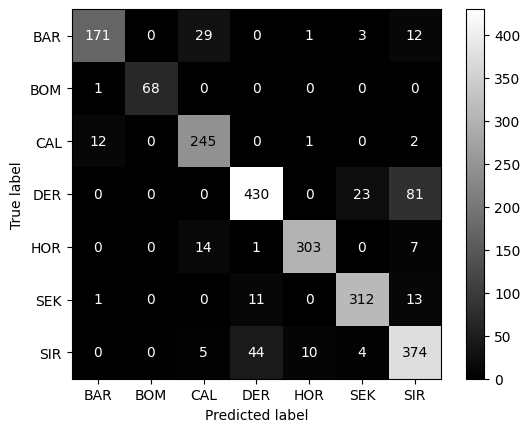

In [16]:
sns.reset_defaults()
cm = confusion_matrix(y_val, predicted_nc)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = c_labels).plot(cmap='gray')
print(classification_report(y_val, predicted_nc))

Najlepszym modelem dla badanych danych okazał się klasyfikator kNN z k = 15, oraz 15 wybranymi przez selektor cech SelectKBest cechami. Osiągnął on sumaryczną dokładność 92%, co jest bardzo dobrym wynikiem dla tak skorelowanych poszczególnych cech w zbiorze danych. Klasyfikatory NN oraz NM wykazały kolejno 91% i 87% dokładności, co jest wynikiem nieznacznie gorszym od klasyfikatora kNN. Jako metodę selekcji cech wybrano funkcję f_classif, domyślną metodę używaną w SelectKBest. Polega ona na obliczaniu wartości F w rozkładzie F dla każdej cechy i filtrowaniu k cech o największej wartości F.

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.92      0.95      0.93       317
           3       0.90      0.91      0.90       671
           4       0.97      0.94      0.96       408
           5       0.97      0.94      0.96       413
           6       0.86      0.89      0.88       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



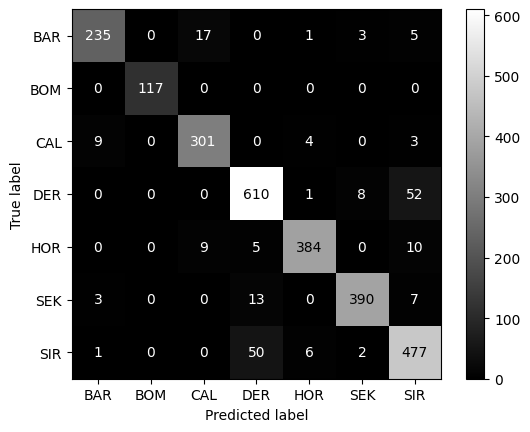

In [17]:
predicted_knn = search_knn.predict(x_test)
sns.reset_defaults()
cm = confusion_matrix(y_test, predicted_knn)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = c_labels).plot(cmap='gray')
print(classification_report(y_test, predicted_knn))